In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/company_expenses.csv')
df['date'] = pd.to_datetime(df['date'])
df['amount'] = df['amount'].astype(float)

In [7]:
df.head()

,date,department,category,amount,payment_method
0,2025-01-01,IT,Ushqim,12.5,Card
1,2025-01-01,Marketing,Transport,8.0,Cash
2,2025-01-02,HR,Ushqim,15.0,Card
3,2025-01-02,IT,Software,120.0,Card
4,2025-01-03,Marketing,Argëtim,45.0,Card


In [10]:
dept_total = df.groupby('department')['amount'].sum()
dept_total

department
HR           104.5
IT           342.5
Marketing    203.0
Name: amount, dtype: float64

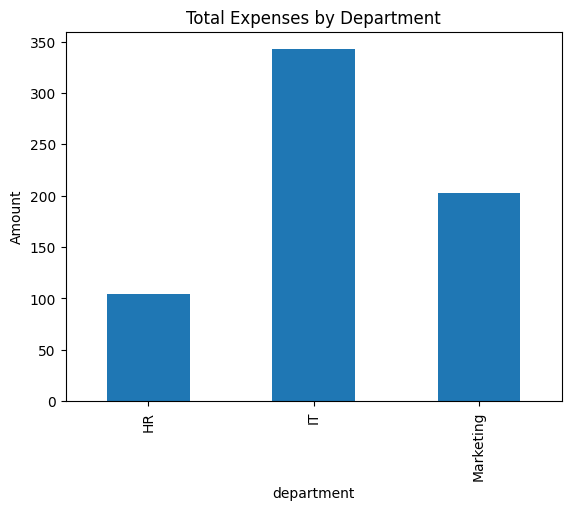

In [11]:
dept_total.plot(kind='bar')
plt.title('Total Expenses by Department')
plt.ylabel('Amount')
plt.show()

In [14]:
top_categories = (
    df.groupby('category')['amount'].sum().sort_values(ascending=False).head(3)
)
top_categories

category
Software    320.0
Ads         150.0
Training     80.0
Name: amount, dtype: float64

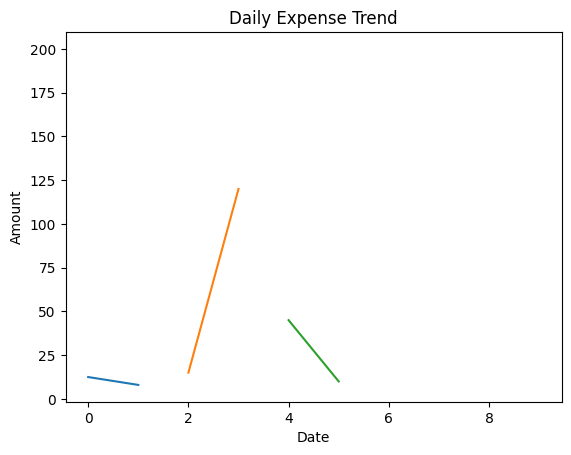

In [21]:
daily = df.groupby('date')['amount']
daily.plot()
plt.title('Daily Expense Trend')
plt.ylabel('Amount')
plt.xlabel('Date')
plt.show()

In [18]:
payment = df.groupby('payment_method')['amount'].sum()
payment_count = df.groupby('payment_method')['amount'].count()
payment,payment_count

(payment_method
 Card    622.5
 Cash     27.5
 Name: amount, dtype: float64,
 payment_method
 Card    7
 Cash    3
 Name: amount, dtype: int64)

In [19]:
dept_total.to_csv('../output/reports/department_totals.csv')

In [20]:
top_categories.to_csv('../output/reports/top_cateogries.csv')